### Libraries 📚⬇

In [1]:
!unzip /content/UDD.v1i.yolov5pytorch.zip

Archive:  /content/UDD.v1i.yolov5pytorch.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/0009_jpg.rf.468557fdf3da784d6ccded16e9366f72.jpg  
 extracting: test/images/0023_jpg.rf.600eadd57cc9d0bfa824c092d8dce7ed.jpg  
 extracting: test/images/0028_jpg.rf.317d20c5c8da76ebba15cf6e5fb41c0d.jpg  
 extracting: test/images/0042_jpg.rf.5c6e382accb6c88a9dfa71eaf032efd6.jpg  
 extracting: test/images/0053_jpg.rf.09c5a0f5af288f9426616259b0307fae.jpg  
 extracting: test/images/0083_jpg.rf.cee780cf39c6d3b7157d81217fbbdb00.jpg  
 extracting: test/images/0096_jpg.rf.ab657cc8420719de58193cdffe8265c3.jpg  
 extracting: test/images/0099_jpg.rf.cad36a20a40ebb0de2378db1214eeef1.jpg  
 extracting: test/images/0124_jpg.rf.f3228afe3b02618ff98e8fe373875908.jpg  
 extracting: test/images/0189_jpg.rf.3e1771185e2374613a8de8ef804451f8.jpg  
 extracting: test/images/0204_jpg.rf

In [2]:
import os, time, random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
id_list = []
labels_list = []
path_image_list = []
train = pd.DataFrame()

directory = '/content/train/labels'
for filename in os.listdir(directory):
    print(filename)
    id_list.append(filename[:4])
    path_image_list.append(f'{filename[:-4]}.jpg')
    object_list = []
    archive = open(f'{directory}/{filename}')
    for line in archive.readlines():
        l = [float(i) for i in line.split(' ')]
        object_list.append(l)

    labels_list.append(object_list)

train['image_id'] = id_list
train['labels'] = labels_list
train['path_images'] = path_image_list

train.sort_values(by=['image_id'], inplace=True)

0211_jpg.rf.109f7ebcc91fc5824b7fd4efda7f5544.txt
1230_jpg.rf.2c515f77c20b93eb2a4f29ebae092b1b.txt
17826_jpg.rf.a6a7db4f3616fc0ce97fb0ac242b81f2.txt
1618_jpg.rf.013f7ca0ad83be62de1d2ad7b5d82472.txt
0716_jpg.rf.434f191664e01b6c54e505827513390f.txt
1766_jpg.rf.d2186535f69cc0501cc4719188646cfb.txt
0230_jpg.rf.be61e8d4b8b1100fbced36c780e7d8d3.txt
0250_jpg.rf.17825c48e1d6f546ada246d14fbc3d32.txt
19013_jpg.rf.7a700279e0afd30aaad6525afa789241.txt
1976_jpg.rf.c68badc7deb321e4902eaafcd0ddb9f0.txt
1998_jpg.rf.5384e4989fa5e95657f0e4a88fa711a2.txt
18518_jpg.rf.f26c858109d66b6160f750fd1994dadf.txt
1926_jpg.rf.047ac2fb9e2589c3c9f82cc43dfed3fc.txt
1232_jpg.rf.98eba53a9031bfece1d307a8002fc106.txt
0389_jpg.rf.21b9e57308a68fd674f2625aaeddf9d7.txt
0701_jpg.rf.57c0d303a2589b05b524a4afd1018a16.txt
1628_jpg.rf.9466c9b5f4f85d779bc5a121a1fab2b2.txt
2050_jpg.rf.a9779efc50521d91977e77bb89e53e89.txt
0684_jpg.rf.9155ef1960734893592fc33d819948bd.txt
1043_jpg.rf.b178a811fbef8902dbb3c30088033086.txt
18161_jpg.rf.1529

In [4]:
train_csv = pd.read_csv('/content/_annotations.csv')
train_csv.sort_values(by=['filename'], inplace=True)
train_csv

,filename,width,height,class,xmin,ymin,xmax,ymax
6054,0000_jpg.rf.424c6f7925c1060f4c441a7c1d09bf3f.jpg,640,640,seaurchin,336,119,376,180
6052,0000_jpg.rf.424c6f7925c1060f4c441a7c1d09bf3f.jpg,640,640,seaurchin,85,412,141,492
6053,0000_jpg.rf.424c6f7925c1060f4c441a7c1d09bf3f.jpg,640,640,seaurchin,157,111,197,173
11164,0003_jpg.rf.5ce322d113737a4735016b246fd4caff.jpg,640,640,seaurchin,198,130,226,173
11165,0003_jpg.rf.5ce322d113737a4735016b246fd4caff.jpg,640,640,seaurchin,58,18,86,59
...,...,...,...,...,...,...,...,...
2525,2226_jpg.rf.997e34c9f340dd0345966fe28a8007b7.jpg,640,640,seaurchin,204,158,284,302
2526,2226_jpg.rf.997e34c9f340dd0345966fe28a8007b7.jpg,640,640,seaurchin,241,281,322,411
2529,2226_jpg.rf.997e34c9f340dd0345966fe28a8007b7.jpg,640,640,seaurchin,2,82,93,316
2527,2226_jpg.rf.997e34c9f340dd0345966fe28a8007b7.jpg,640,640,seaurchin,350,324,403,419


Photo shape: (640, 640, 3)


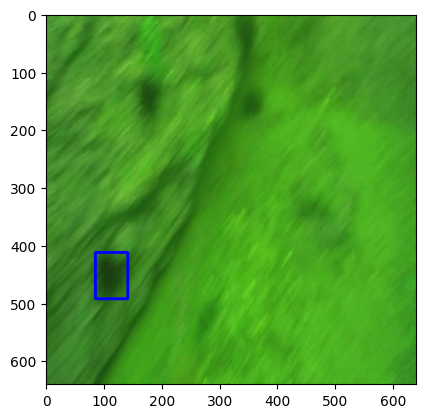

In [5]:
photo=cv2.imread('/content/train/images/0000_jpg.rf.424c6f7925c1060f4c441a7c1d09bf3f.jpg')
print('Photo shape:',photo.shape)
#   pt1=(int(i[1]),int(i[2]))
#   pt2=(int(i[3]),int(i[4]))
color=(0, 0, 255)
thickness = 3
cv2.rectangle(photo,(85, 412), (141, 492), color, thickness)
plt.figure()
plt.imshow(photo)

## Loading Data 📝 / Preprocessing ⚙️

In [6]:
img_h, img_w, num_channels = (640, 640, 3)
#train['image_id'] = train['image_id'].apply(lambda x: x.split('.')[0])
train_csv['x_center'] = (train_csv['xmin'] + train_csv['xmax'])/2
train_csv['y_center'] = (train_csv['ymin'] + train_csv['ymax'])/2
train_csv['w'] = train_csv['xmax'] - train_csv['xmin']
train_csv['h'] = train_csv['ymax'] - train_csv['ymin']
train_csv['x_center'] = train_csv['x_center']/img_w
train_csv['w'] = train_csv['w']/img_w
train_csv['y_center'] = train_csv['y_center']/img_h
train_csv['h'] = train_csv['h']/img_h
train_csv.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,x_center,y_center,w,h
6054,0000_jpg.rf.424c6f7925c1060f4c441a7c1d09bf3f.jpg,640,640,seaurchin,336,119,376,180,0.556250,0.233594,0.06250,0.095312
6052,0000_jpg.rf.424c6f7925c1060f4c441a7c1d09bf3f.jpg,640,640,seaurchin,85,412,141,492,0.176563,0.706250,0.08750,0.125000
6053,0000_jpg.rf.424c6f7925c1060f4c441a7c1d09bf3f.jpg,640,640,seaurchin,157,111,197,173,0.276562,0.221875,0.06250,0.096875
11164,0003_jpg.rf.5ce322d113737a4735016b246fd4caff.jpg,640,640,seaurchin,198,130,226,173,0.331250,0.236719,0.04375,0.067187
11165,0003_jpg.rf.5ce322d113737a4735016b246fd4caff.jpg,640,640,seaurchin,58,18,86,59,0.112500,0.060156,0.04375,0.064062


In [7]:
# Download YOLOv5
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
# Install dependencies
%pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 16308, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 16308 (delta 96), reused 99 (delta 34), pack-reused 16103
Receiving objects: 100% (16308/16308), 15.11 MiB | 23.16 MiB/s, done.
Resolving deltas: 100% (11131/11131), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.8/699.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.
/content
Setup complete. Using torch

In [8]:
# Create .yaml file
import yaml

data_yaml = dict(
    train = '/content/train/images',
    val = '../content/test/images',
    nc = 3,
    names = ['seaurchin', 'seacucumber', 'scalop']
)

# Note that I am creating the file in the yolov5/data/ directory.
with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [9]:
%cd yolov5

/content/yolov5


In [13]:
!wandb disabled
!python train.py --img 416 --batch 16 --epochs 50 --data /content/data.yaml --weights yolov5n.pt

/bin/bash: line 1: wandb: command not found
2024-01-15 19:58:38.645770: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 19:58:38.645853: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 19:58:38.647427: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5n.pt, cfg=, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False

In [17]:
!python detect.py --source /content/test/images/0023_jpg.rf.600eadd57cc9d0bfa824c092d8dce7ed.jpg --weights /content/yolov5/runs/train/exp2/weights/best.pt


detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/test/images/0023_jpg.rf.600eadd57cc9d0bfa824c092d8dce7ed.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-274-g7d9a117 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1763224 parameters, 0 gradients, 4.1 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/test/images/0023_jpg.rf.600eadd57cc9d0bfa824c092d8dce7ed.jpg: 640x640 7 scalops, 5.4ms
Speed: 0.6ms pre-process, 5.4ms inference, 676.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/det

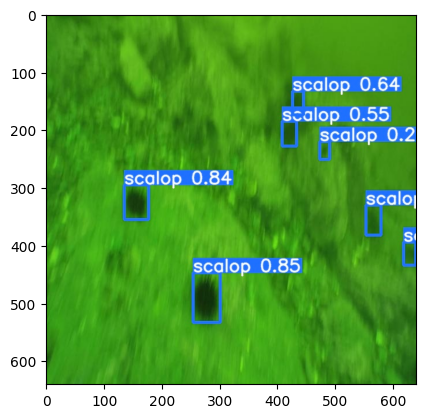

In [21]:
import cv2
img = cv2.imread("/content/yolov5/runs/detect/exp4/0023_jpg.rf.600eadd57cc9d0bfa824c092d8dce7ed.jpg")
plt.imshow(img)